In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import mixture
sns.set(style='whitegrid')
sns.set_palette('bright')
import warnings
warnings.filterwarnings('ignore')
import collections
from scipy.spatial import distance


<AxesSubplot:ylabel='Density'>

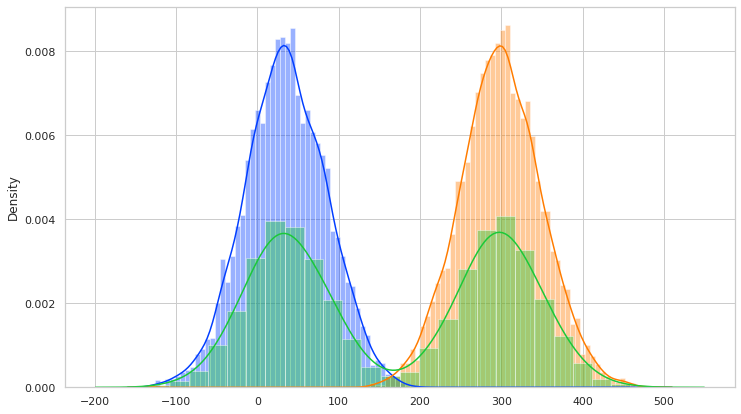

In [46]:
value1 = np.random.normal(loc=35,scale=50,size=5000)
#value2 =  np.random.normal(loc=300,scale=20,size=10000)
q1 = value1
value1 = np.random.normal(loc=300,scale=50,size=5000)
#value2 =  np.random.normal(loc=35,scale=20,size=10000)
q2 = value1
q = np.concatenate([q1,q2])
q1[-1] = q.max()
q2[-1] = q.min()
fig = plt.subplots(1,1,figsize = (12,7))
sns.distplot(q1,bins=100)
sns.distplot(q2,bins=100)
sns.distplot(q)

array([1.900e+01, 7.100e+01, 2.550e+02, 5.830e+02, 1.044e+03, 1.240e+03,
       9.320e+02, 5.570e+02, 2.310e+02, 6.200e+01, 5.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00])

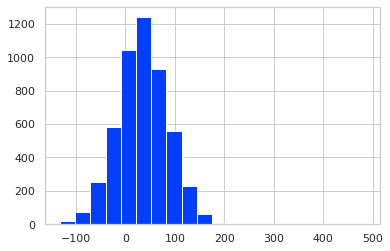

In [47]:
(n, bins, patches) = plt.hist(q1, bins=20, label='hst')
n

array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 3.000e+00, 2.800e+01, 1.290e+02, 3.640e+02,
       7.700e+02, 1.180e+03, 1.149e+03, 8.020e+02, 3.860e+02, 1.460e+02,
       3.500e+01, 7.000e+00])

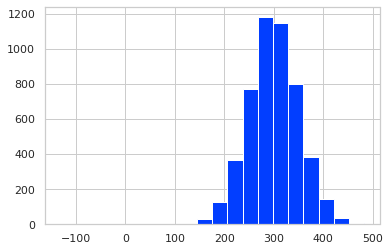

In [48]:
(n, bins, patches) = plt.hist(q2, bins=20, label='hst')
n

In [49]:
count1, bin_edges1 = np.histogram(q1, bins=20)
print(count1)
print(bin_edges1)

[  19   71  255  583 1044 1240  932  557  231   62    5    0    0    0
    0    0    0    0    0    1]
[-132.07358464 -101.3437037   -70.61382276  -39.88394182   -9.15406088
   21.57582006   52.305701     83.03558194  113.76546288  144.49534383
  175.22522477  205.95510571  236.68498665  267.41486759  298.14474853
  328.87462947  359.60451041  390.33439136  421.0642723   451.79415324
  482.52403418]


In [50]:
count2, bin_edges2 = np.histogram(q2, bins=20)
print(count2)
print(bin_edges2)

[   1    0    0    0    0    0    0    0    3   28  129  364  770 1180
 1149  802  386  146   35    7]
[-132.07358464 -101.3437037   -70.61382276  -39.88394182   -9.15406088
   21.57582006   52.305701     83.03558194  113.76546288  144.49534383
  175.22522477  205.95510571  236.68498665  267.41486759  298.14474853
  328.87462947  359.60451041  390.33439136  421.0642723   451.79415324
  482.52403418]


In [55]:
intersect =[]
for i in range(count1.shape[0]):
    intersect.append(min(count1[i],count2[i]))
intersect = np.array([intersect])
intersect

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  3, 28,  5,  0,  0,  0,  0,  0,
         0,  0,  0,  1]])

In [57]:
union = []
for i in range(count1.shape[0]):
    union.append(max(count1[i],count2[i]))
union = np.array([union])
union

array([[  19,   71,  255,  583, 1044, 1240,  932,  557,  231,   62,  129,
         364,  770, 1180, 1149,  802,  386,  146,   35,    7]])

In [58]:
jacc = intersect / union
jacc

array([[0.05263158, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01298701, 0.4516129 ,
        0.03875969, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.14285714]])

In [59]:
jacc.mean()

0.03494241639699056